In [273]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [316]:
data = pd.read_csv('seasons_stats.csv')

data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [317]:
#Only run this once
data.drop(['Unnamed: 0', 'blanl', 'blank2'],axis = 1, inplace = True)
data.dropna(inplace = True)

In [352]:
df = data.set_index(["Year", "Player"]) # index
df = df.iloc[:,df.columns == 'PER']
df
#df = df['PER'].unstack().shift(+1) # pull out the groups, shift with lag step=1
#df = df.stack(dropna=False);df

PER
Year   Player                    
1980.0 Tiny Archibald*       15.3
       Larry Bird*           20.5
       M.L. Carr             14.6
       Don Chaney             7.8
       Dave Cowens*          14.8
       Chris Ford            13.0
       Gerald Henderson      12.7
       Jeff Judkins          14.1
       Pete Maravich*        13.8
       Pete Maravich*        15.6
       Rick Robey            15.4
1981.0 Tiny Archibald*       14.3
       Larry Bird*           19.9
       M.L. Carr             11.6
       Terry Duerod          13.8
       Terry Duerod          14.3
       Chris Ford             8.8
       Gerald Henderson      10.4
       Wayne Kreklow         -1.9
       Cedric Maxwell        17.6
       Kevin McHale*         16.4
       Robert Parish*        25.2
       Rick Robey            14.9
1982.0 Kareem Abdul-Jabbar*  23.4
       Alvan Adams           18.6
       Mark Aguirre          17.3
       Danny Ainge           10.1
       Tiny Archibald*       14.3
       Greg Ballard          17.9
       Gene Banks            14.7
...                           ...
2017.0 Alan Williams         19.5
       Deron Williams        14.0
       Deron Williams        15.0
       Deron Williams        11.4
       Derrick Williams      10.6
       Derrick Williams      10.1
       Derrick Williams      11.1
       Lou Williams          21.4
       Lou Williams          23.9
       Lou Williams          15.4
       Marvin Williams       13.7
       Reggie Williams       11.7
       Troy Williams          8.9
       Troy Williams          7.6
       Troy Williams         12.8
       Kyle Wiltjer           6.7
       Justise Winslow        8.2
       Jeff Withey           18.8
       Christian Wood        15.1
       Metta World            6.2
       Brandan Wright        18.5
       Delon Wright          15.0
       James Young           10.0
       Joe Young             11.4
       Nick Young            14.1
       Thaddeus Young        14.9
       Cody Zeller           16.7
       Tyler Zeller          13.0
       Paul Zipser            6.9
       Ivica Zubac           17.0

[14585 rows x 1 columns]

In [293]:
dftest = data.set_index(["season", "player"]) # index
dftest = dftest.iloc[:,dftest.columns == 'per']
dftest

per
season  player                         
2002-03 Tracy McGrady             31.01
        Shaquille O'Neal          29.43
        Kobe Bryant               27.07
        Kevin Garnett             26.46
        Tim Duncan                26.46
        Dirk Nowitzki             25.94
        Steve Nash                23.51
        Paul Pierce               23.49
        Sam Cassell               23.08
        Jason Kidd                22.62
        Vince Carter              22.48
        Ray Allen                 22.19
        Allen Iverson             22.14
        Gary Payton               21.94
        Karl Malone               21.71
        Chris Webber              21.48
        Michael Redd              21.33
        Jermaine O'Neal           21.16
        Steve Francis             21.12
        Chauncey Billups          21.10
        Elton Brand               21.09
        Shawn Marion              21.05
        Stephon Marbury           21.03
        Grant Hill                21.02
        John Stockton             20.68
        Pau Gasol                 20.66
        Yao Ming                  20.20
        Michael Jordan            20.14
        Shareef Abdur-Rahim       20.09
        Peja Stojakovic           20.04
...                                 ...
2019-20 Darius Garland             8.57
        Wayne Ellington            8.52
        Hamidou Diallo             8.47
        Rodions Kurucs             8.43
        Dzanan Musa                8.41
        Kevin Knox II              8.40
        Wesley Matthews            8.39
        Darius Bazley              8.17
        Matthew Dellavedova        8.16
        Tyler Johnson              8.13
        Grant Williams             8.06
        Frank Jackson              7.74
        Kenrich Williams           7.66
        Semi Ojeleye               7.64
        Nickeil Alexander-Walker   7.62
        Vince Carter               7.60
        Dennis Smith Jr.           7.51
        Wilson Chandler            7.45
        Patrick McCaw              7.35
        Luguentz Dort              7.34
        Jordan Poole               7.28
        Anthony Tolliver           6.66
        Treveon Graham             6.63
        Rodney McGruder            6.56
        Sekou Doumbouya            6.29
        Dwayne Bacon               6.15
        Jerome Robinson            6.04
        Allen Crabbe               6.00
        Jacob Evans                5.55
        Terrance Ferguson          4.15

[6119 rows x 1 columns]

In [278]:
data.set_index(['season','player'], inplace = True)
m_data = pd.concat([data, df],axis = 1)
m_data.dropna(inplace = True)

In [279]:
X = pd.DataFrame(m_data.loc[:,m_data.columns != 'per'])
Y = pd.DataFrame(m_data.loc[:,m_data.columns == 'per'])

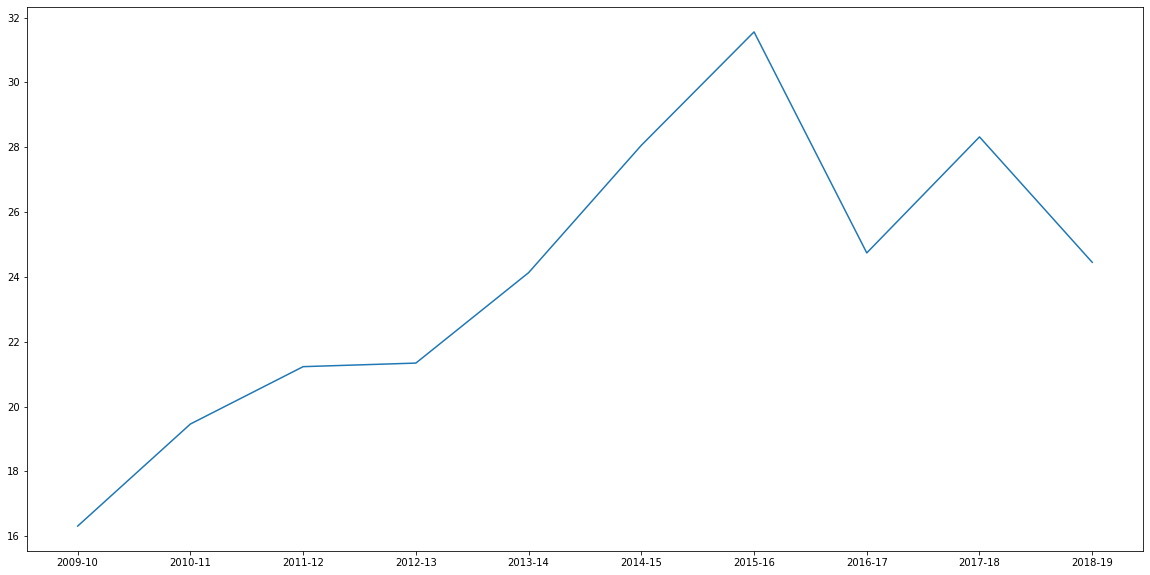

In [280]:
plt.figure(figsize=(20,10))
plt.plot(k_data['season'],k_data['per'])

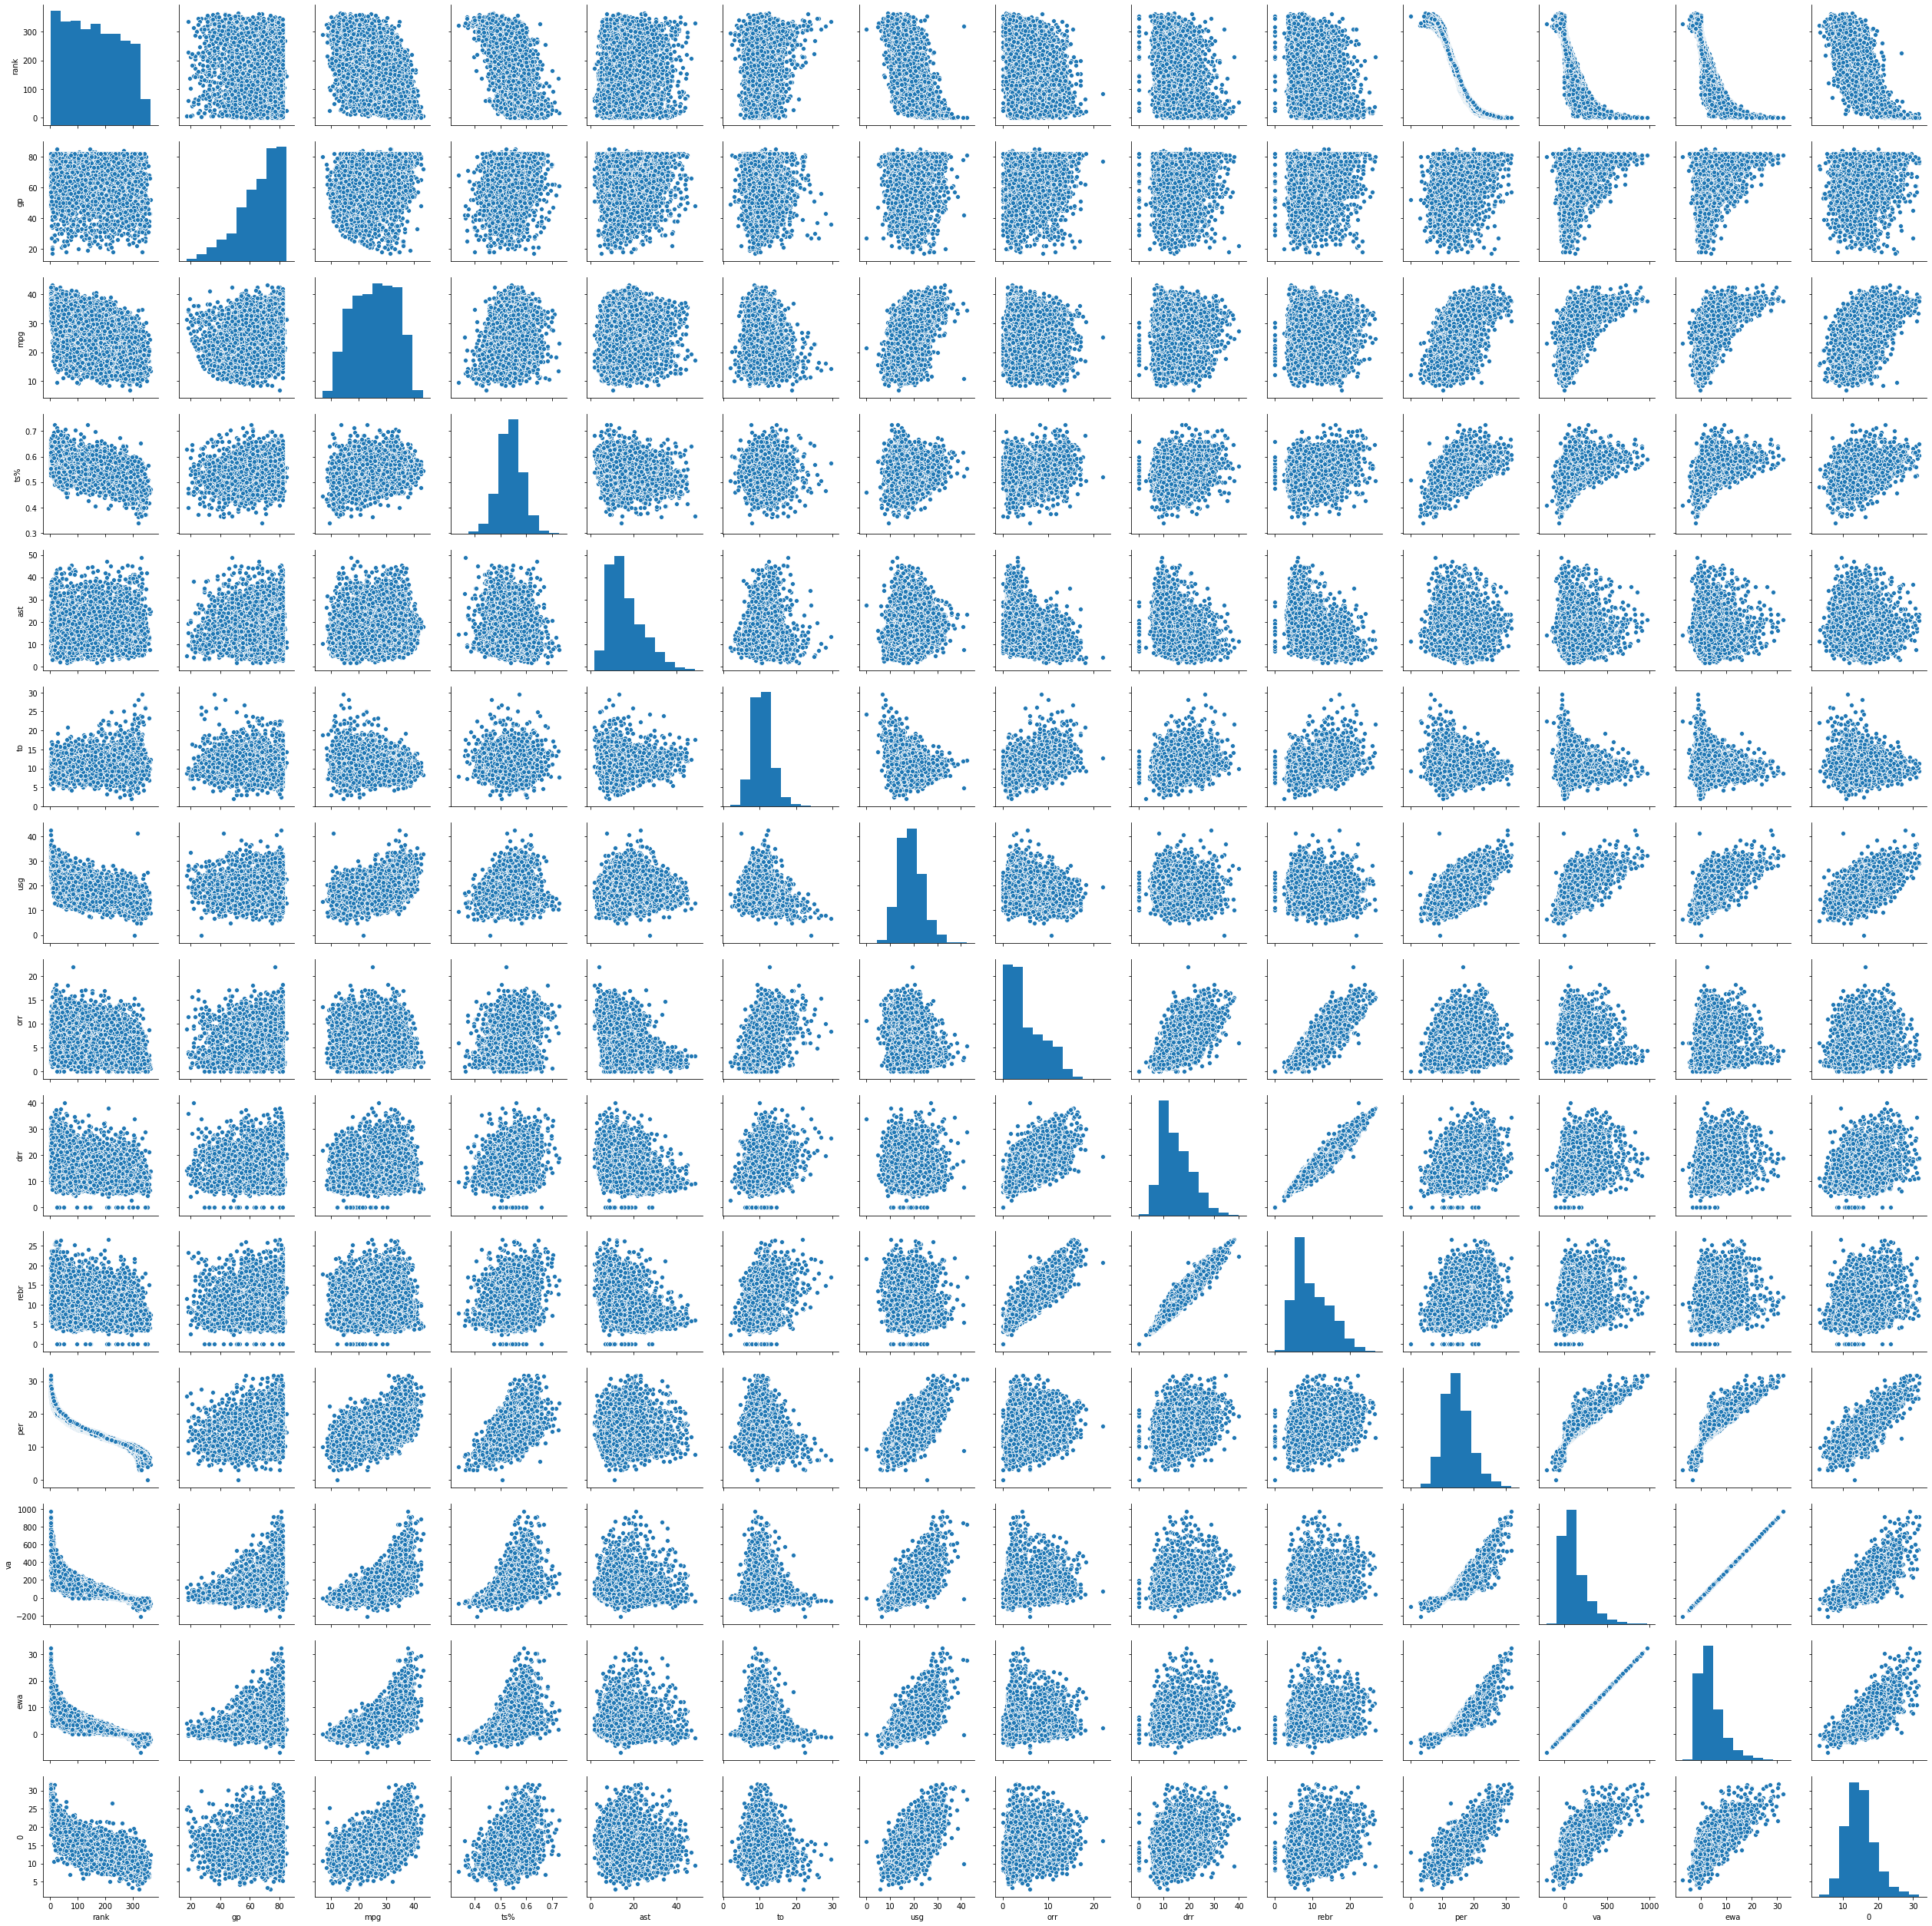

In [281]:
sns.pairplot(m_data)

In [285]:
X = pd.DataFrame(m_data.loc[:,m_data.columns != 'per'])
Y = pd.DataFrame(m_data.loc[:,m_data.columns == 'per'])
X.drop(columns = 'team',inplace = True)

In [255]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
print(lr.coef_)

c = pd.DataFrame(lr.coef_,columns = X.columns)

[[-1.95512456e-02 -1.11888074e-02 -1.98801717e-02  1.17245519e+01
   3.99584403e-02 -1.04371152e-01  1.48518246e-01 -5.44048207e-02
  -1.55985837e-01  3.78644250e-01  2.85491041e-02 -5.77366384e-01
   7.00197154e-02]]


In [304]:
lr.predict(X,Y)

TypeError: predict() takes 2 positional arguments but 3 were given